# Exploring The World Development Indicators 

This project is based on [The World Development Indicators database (WDI)](https://databank.worldbank.org/home). The database contains a collection of thousands of development indicators from 247 countries all around the world, for example: currency, government accounting concept, income group, adolescent fertility rate, food exports, etc.


The database was last updated on May 28th, 2020.


In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
#Establish connection with the database
conn = sqlite3.connect('C://Users//Leehee//Desktop//python//EDA//database.sqlite')


## Getting to Know the Database

In [3]:
#Get tables names
  
get_tables_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in get_tables_names:
    print(name[0])

Country
CountryNotes
Series
Indicators
SeriesNotes
Footnotes


In [4]:
#Get info from the main table
for c in conn.execute("PRAGMA table_info(country)"):
    print(c)

(0, 'CountryCode', 'TEXT', 0, None, 0)
(1, 'ShortName', 'TEXT', 0, None, 0)
(2, 'TableName', 'TEXT', 0, None, 0)
(3, 'LongName', 'TEXT', 0, None, 0)
(4, 'Alpha2Code', 'TEXT', 0, None, 0)
(5, 'CurrencyUnit', 'TEXT', 0, None, 0)
(6, 'SpecialNotes', 'TEXT', 0, None, 0)
(7, 'Region', 'TEXT', 0, None, 0)
(8, 'IncomeGroup', 'TEXT', 0, None, 0)
(9, 'Wb2Code', 'TEXT', 0, None, 0)
(10, 'NationalAccountsBaseYear', 'TEXT', 0, None, 0)
(11, 'NationalAccountsReferenceYear', 'TEXT', 0, None, 0)
(12, 'SnaPriceValuation', 'TEXT', 0, None, 0)
(13, 'LendingCategory', 'TEXT', 0, None, 0)
(14, 'OtherGroups', 'TEXT', 0, None, 0)
(15, 'SystemOfNationalAccounts', 'TEXT', 0, None, 0)
(16, 'AlternativeConversionFactor', 'TEXT', 0, None, 0)
(17, 'PppSurveyYear', 'TEXT', 0, None, 0)
(18, 'BalanceOfPaymentsManualInUse', 'TEXT', 0, None, 0)
(19, 'ExternalDebtReportingStatus', 'TEXT', 0, None, 0)
(20, 'SystemOfTrade', 'TEXT', 0, None, 0)
(21, 'GovernmentAccountingConcept', 'TEXT', 0, None, 0)
(22, 'ImfDataDissemina

In [5]:
#Get all tables as a df
pd.read_sql(""" SELECT type,name,rootpage
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,rootpage
0,table,Country,2
1,table,CountryNotes,186
2,table,Series,948
3,table,Indicators,4448
4,table,SeriesNotes,1317550
5,table,Footnotes,1317587


## Exploring The Indicatrs Table

In [6]:
#Get the indicators table as a dataframe
pd.read_sql(""" SELECT * FROM indicators LIMIT 5;""", conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [7]:
#Get all unique indicators 
pd.read_sql(""" SELECT distinct indicatorname FROM indicators; """, conn)


#List of countries names
pd.read_sql(""" SELECT countryname, count(countryname) FROM indicators GROUP BY countryname; """, conn)
#Number of countries
pd.read_sql(""" SELECT count(distinct countryname) totalCountries FROM indicators; """, conn)



,totalCountries
0,247


In [8]:
#Check for NULL values
pd.read_sql(""" SELECT count(*) - count(countryname) missing_country_name,
                       count(*) - count(countrycode) missing_country_code,
                       count(*) - count(indicatorname) missing_indicatorname,
                       count(*) - count(year) missing_year
                    FROM indicators; """, conn)


,missing_country_name,missing_country_code,missing_indicatorname,missing_year
0,0,0,0,0


In [23]:
#Get country with most info
pd.read_sql(""" SELECT count(distinct indicatorname) numberOfuniqueIndicators
                    FROM indicators 
                    GROUP BY countryname
                    ORDER BY numberOfuniqueIndicators DESC
                    LIMIT 1; """, conn)



,numberOfuniqueIndicators
0,1307


There are 247 countries in the dataframe, describing 1344 development indicators. There are no missing values.
Bolivia has the most indicators with 1,307 different indictaros.


## Which Country Has the Highets Survival to 65y/o rate?

In [10]:
#Females - top 10 countries with highest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_female
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, female (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_female DESC
                    LIMIT 10;""", conn)

#Females - bottom 10 countries with lowest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_female
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, female (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_female ASC
                    LIMIT 10;""", conn)

#Males - top 10 countries with highest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_male
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, male (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_male DESC
                    LIMIT 10;""", conn)

#Males - bottom 10 countries with lowest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_male
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, male (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_male ASC
                    LIMIT 10;""", conn)

,CountryName,avg_survival65_male
0,Sierra Leone,26.724106
1,Eritrea,29.941574
2,Angola,30.038119
3,South Sudan,31.710769
4,Mozambique,32.200426
5,Rwanda,33.123776
6,Central African Republic,33.518350
7,Malawi,34.509180
8,Nigeria,34.710914
9,Chad,34.763499


In [11]:
#Females - Israel's survival rate over the years
pd.read_sql(""" SELECT countryname, year, value as survival65_female
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, female (% of cohort)' and countrycode='ISR' 
                    GROUP BY countryname,year
                    ORDER BY survival65_female asc
;""", conn)



#Males - Israel's survival rate over the years
pd.read_sql(""" SELECT countryname, year, value as survival65_male
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, male (% of cohort)' and countrycode='ISR' 
                    GROUP BY countryname,year
                    ORDER BY survival65_male asc
                    LIMIT 5
;""", conn)



,CountryName,Year,survival65_male
0,Israel,1960,72.43785
1,Israel,1961,72.68368
2,Israel,1962,72.92951
3,Israel,1963,73.13459
4,Israel,1964,73.33966


In [12]:
#Females - Israel's survival chart over the years, 1960 - 2013
print(pd.read_sql("""SELECT countryName, year, min(value), max(value), max(value) - min(value) increased_survival_percentages_female
               FROM indicators
               WHERE indicatorName = 'Survival to age 65, female (% of cohort)'
               and countrycode = 'ISR';""", conn))


#Males - Israel's survival chart over the years, 1960 - 2013
print(pd.read_sql("""SELECT countryName, year, min(value), max(value), max(value) - min(value) increased_survival_percentages_male
               FROM indicators
               WHERE indicatorName = 'Survival to age 65, male (% of cohort)'
               and countrycode = 'ISR';""", conn))

  CountryName  Year  min(value)  max(value)  \
0      Israel  2013    78.25603    93.10509   

   increased_survival_percentages_female  
0                               14.84906  
  CountryName  Year  min(value)  max(value)  \
0      Israel  2013    72.43785    88.10794   

   increased_survival_percentages_male  
0                             15.67009  


Sweden has the highest survival to 65 y/o rate, with an average of 88.8 years for females, and 81.35 for males.
Sierra Leone presents the lowest survial rate, with 28.4 years for female and 26.7 years for males.
This is an average rate over all the years of the cohort.


Israel's survival rate increased every year, between the years 1960 and 2013.
The survival rate increased by 19% for women and by 21% for males, and as for 2013 it is 93.1 years for females, and 88.1 years for males.

## Which country has the highest adolescent fertility rate?

Is this section, I will query for the country with the highest adolescent fertility rate, with is calucluated by the number of births per 1,000 women ages 15-19, during the 2000's.



In [13]:
#Global
pd.read_sql(""" SELECT avg(value) global_adolescent_fertility_rate_1960_1970
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 1960 and 1970 
                ;""",conn)

pd.read_sql(""" SELECT avg(value) global_adolescent_fertility_rate_2000_2010
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 2000 and 2010 
                ;""",conn)



,global_adolescent_fertility_rate_2000_2010
0,56.857412


In [14]:
#Per country
fertility_rate = pd.read_sql(""" SELECT countryname, avg(value) adolescent_fertility_rate
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 2000 and 2010 
                GROUP BY countryname
                ORDER BY adolescent_fertility_rate
                ;""",conn)

print(fertility_rate.head(), "\n",
fertility_rate.tail())


            CountryName  adolescent_fertility_rate
0      Korea, Dem. Rep.                   0.802873
1           Korea, Rep.                   2.150073
2  Hong Kong SAR, China                   3.494564
3      Macao SAR, China                   3.829527
4           Switzerland                   4.793000 
     CountryName  adolescent_fertility_rate
222  Mozambique                 177.329436
223        Mali                 182.169855
224        Chad                 191.645473
225      Angola                 195.736218
226       Niger                 214.840436


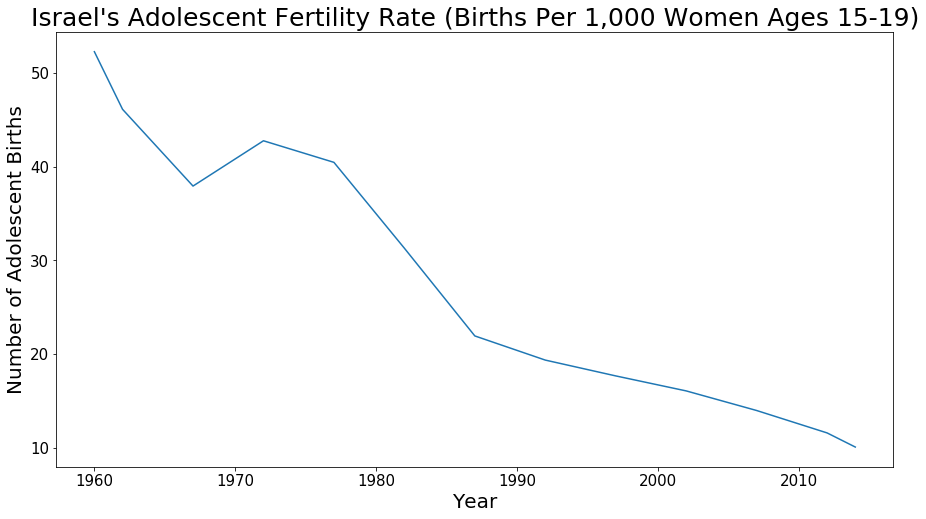

In [17]:
#Israel's adolescent fertility rate - total average
pd.read_sql(""" SELECT countryname, avg(value) adolescent_fertility_rate
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 2000 and 2010 and countrycode = 'ISR'
                GROUP BY countryname
                ;""",conn)

#Israel's adolescent fertility rate - grouped by year
isr_fr = pd.read_sql(""" SELECT countryname, year, value adolescent_fertility_rate
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and countrycode = 'ISR'
                GROUP BY countryname, year
                ;""",conn)


plt.figure(figsize=(15,8))
isr_fr_plot = sns.lineplot(x="Year",  y="adolescent_fertility_rate", data=isr_fr)
isr_fr_plot.set_title("Israel's Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)",fontsize=25)
isr_fr_plot.set_xlabel('Year', fontsize=20)
isr_fr_plot.set_ylabel('Number of Adolescent Births', fontsize=20)
isr_fr_plot.tick_params(labelsize=15)



The global adolescent fertility rate during the 2000's is 56.8 per 1000 births. Countries in Africa has the highest adolescent fertility rate (214/1000 in Niger), while Korea has the lowest (0.8/1000).

Israel's adolescent fertility rate from 2000 to 2010 is on overage 14.7 births per 1000 women. 
The number of asolescent birth is consistently decreasing since 1960, except for an increase during 1969-1973, could be due to political conflicts, the war of Attrition and the Yum Kipur war.


## CO2 Emissions Analysis, using SQL SERVER & SSMS

This analysis will focus on the CO2 emissions indicator, using Microsoft SQL Server Management Studio.

In [2]:
#First, let's find all the indicators related to CO2 emissions.
SELECT DISTINCT 
        IndicatorName, 
        IndicatorCode 
        FROM Indicators 
WHERE IndicatorName LIKE 'CO2%'



#Explore this indicator
SELECT TOP(1) 
    i.Indicatorname,
    s.topic, s.LongDefinition, 
    s.Periodicity, 
    s.LimitationsAndExceptions
    FROM Indicators i
JOIN series s ON s.seriescode = i.IndicatorCode
WHERE IndicatorCode = 'EN.ATM.CO2E.KT'

SyntaxError: invalid syntax (<ipython-input-2-9c64d37b03ca>, line 2)

There are 17 different CO2 indicators and unit measurments.
For this analyis, I will focus on the 'CO2 Emission (kt)' indicator.

The definition of the CO2 emissions (kt) is: "Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring".
It is calculated as an annualy weighted average.

In [ ]:
#Next, for easier interpetation, the years will be binned into decades. 
#Focus on years 1960 to 2010 Only (Since there is missing data in the 2010's).
#View will be created and stored, to simplify future queries

CREATE VIEW [CO2_decades] AS

SELECT 
    i.Indicatorname,
    i.CountryName, 
    i.value,
    CASE 
    WHEN YEAR BETWEEN 1960 AND 1970 THEN '60s'
    WHEN YEAR BETWEEN 1971 AND 1980 THEN '70s'
    WHEN YEAR BETWEEN 1981 AND 1990 THEN '80s'
    WHEN YEAR BETWEEN 1991 AND 2000 THEN '90s'
    WHEN YEAR BETWEEN 2001 AND 2010 THEN '2000s'
    ELSE 'NA'
    END AS 'Decade'
FROM Indicators i
LEFT JOIN series s ON s.seriescode = i.IndicatorCode
WHERE IndicatorCode = 'EN.ATM.CO2E.KT'


In [ ]:
#Finally, we can find the global CO2 emissions statistics per decase, in kt units
SELECT decade,
       ROUND(MAX(value),1) max_co2_emissions, 
       ROUND(MIN(value),1) min_co2_emissions, 
       ROUND(AVG(value),1) avg_co2_emissions, 
       ROUND(STDEV(value),1) std_co2_emissions 
FROM co2_decades
WHERE decade <> 'NA'
GROUP BY decade
ORDER BY Decade ASC



<h3><center>CO2 Global Emissions/Decade  1960 - 2010, kt</center></h3>

<img src="assets/co2globalemissions.png" />

In [ ]:
#Calculte Average of CO2 emissions per country
SELECT 
    CountryName, 
    decade, 
    ROUND(AVG(value),1) avg_co2_emissions
FROM CO2_decades
WHERE decade <> 'NA'
GROUP BY CountryName, decade
ORDER BY CountryName ASC, decade ASC

As the global co2 emissions is increasing steadily over the years, there are some countries (Luxemburg, for example) that present decreasing amounts of co2 emissions. However, we don't have the population size for normalization.

China and the USA have the highest co2 emissions during 2000-2010. The following map was created in Tableau.

<h3><center>CO2 Emissions (kt) by Country, 2000-2010</center></h3>

<img src="assets/co2bycountry.png" />

In [10]:
#Examine avgetage CO2 emissions over the decade by income level
SELECT 
    c.IncomeGroup, 
    decade,
    AVG(cd.value)
FROM CO2_decades cd
LEFT JOIN Country c ON c.CountryCode = cd.CountryCode
WHERE c.IncomeGroup IS NOT NULL AND decade <> 'NA'
GROUP BY c.IncomeGroup, decade
ORDER BY 1,2


IndentationError: unexpected indent (<ipython-input-10-15a618188083>, line 3)

For better understanding what might cause an increase or a decrease, countries can be grouped by income.
Below we can see the CO2 emissions by income group and decase, and for each decade, what is the propostion of the emission per group.
The following plot was created in Power BI.
All income groups increased the CO2 emissions.
The 'Low Income' group increaed mainly during the last deacde (2000-2010).
The 'OECD High Income' group is the most polluting, however due to increasing emissions in the other income groups, the 'OECD High Income' is responsoble for only 53.07% out of all the global emisstions measured during 2000-2010 (as opposed to 83.5% during the 60's).

<img src="assets/co2byincomegroup.png" />

In [2]:
#See which group increased the most, by net value and percentages
#Complete NULL values with COALESCE
WITH cal_diff AS (
    SELECT
        COALESCE(c.IncomeGroup, 'Unknown') AS Incomegroup1, 
        decade, 
        AVG(value) value
    FROM CO2_decades1 cd
    LEFT JOIN Country c ON c.CountryCode = cd.CountryCode
    WHERE c.IncomeGroup IS NOT NULL AND decade <> 'NA'
    GROUP BY c.IncomeGroup, decade
)
SELECT 
    incomegroup1, 
    ROUND(MAX(value) - MIN(value),2) 'Diff',
    ROUND(MAX(value)/MIN(value),2) 'Per%'
FROM cal_diff
GROUP BY IncomeGroup1
ORDER BY diff DESC;



SyntaxError: invalid syntax (<ipython-input-2-1f32cab5aaec>, line 3)

The 'Upper Middle Income' group has increased the most when looking at the emissions level, but the 'High Income Non OECD' group had the highest jump in CO2 emissions with an increase of 11.31%.
The 'Low income' group increased the least, with only 3806 CO2 kt emissions. It's global contribution almost trippled from 0.23% to 0.62% (1960 and 2010, accordingly), but increased iteself by 6.93% (similar to the 'Upper Middle' group).

<img src="assets/diffinemissions.png" />

### Which decade in Israel was the most polluting?

According to the following query (and not normalized to population size), Israel's pollution emissions is increasing steadily, every decade, since 1960. This is similar to the behavior of most of the countries in the world.

In [6]:
WITH isr_co2 AS (
    SELECT 
    co.Decade , 
    AVG(value) avg_val
    FROM  CO2_decades co
    WHERE CountryName = 'Israel' AND decade <> 'NA'
    GROUP BY Decade)
SELECT *, ROW_NUMBER() OVER (ORDER BY avg_val DESC) ranking_pollution_by_decades
FROM isr_co2

SyntaxError: invalid syntax (<ipython-input-6-5e8526d78c48>, line 1)

### How many countries successded in deacresing CO2 emissions during the last deacde?

In [7]:
WITH avg_val AS (
    SELECT 
    countryname, 
    Decade,
    AVG(value) avg_val
FROM  CO2_decades co
WHERE decade <> 'NA'
GROUP BY Decade, CountryName ),

rn AS(
    SELECT *,
    ROW_NUMBER() OVER (PARTITION BY countryname ORDER BY avg_val DESC) ranking_pollution_by_decades
FROM avg_val)

SELECT 
    COUNT(*) AS number_of_countries_with deacresing_co2_emissions
FROM rn
WHERE ranking_pollution_by_decades = 1 and decade <> '2000s'


SyntaxError: invalid syntax (<ipython-input-7-fc6063a0d612>, line 1)

The result of this query is 50 (out of 274 countries in the database). These are unique countries, where the avg CO2 emissions during 2000 to 2010 was not the maximun value of CO2 emissions recorded, since the beginning of the measurments in 1960.
Among these coutnries we can find countries in Africa, south america, west & east Europe.

### How many countries are above the average CO2 emissions?

In [3]:
#copmpute the proportion of countries above the average emissions amount for 2000-2010
SELECT 
CAST(COUNT(*) AS FLOAT)/
CAST(
    (SELECT 
         COUNT(*) FROM CO2_decades  WHERE decade = '2000s') AS FLOAT ) * 100 AS proportion_abv_avg 
FROM CO2_decades 
WHERE  decade = '2000s' and value >
      (SELECT AVG(value) FROM CO2_decades WHERE decade = '2000s')
        
#copmpute the proportion of countries above the average emissions amount for 1960-1970
SELECT 
CAST(COUNT(*) AS FLOAT)/
CAST(
    (SELECT 
         COUNT(*) FROM CO2_decades  WHERE decade = '60s') AS FLOAT ) * 100 AS proportion_abv_avg 
FROM CO2_decades 
WHERE  decade = '60s' and value >
      (SELECT AVG(value) FROM CO2_decades WHERE decade = '60s')
        
    

SyntaxError: invalid syntax (<ipython-input-3-9f55add5d856>, line 2)

Only 11.9% of all countries in this dataset are above the average of CO2 emisstions for the years 2000-2010.
Interestingly, from 1960 to 1970, a total of 10.4% of the countries were above the average of that decade.